## once you have TSNE for full dataset, add it as new column in dataframe. do the same for PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline 

from openTSNE import TSNE

In [2]:
df = pd.read_csv('data/full_labels_df.csv', error_bad_lines=False)

In [3]:
loaded = np.load('data/full_image_arr.npz')

In [4]:
bw_img = loaded['b']

In [5]:
# normalize
# not needed when all data on same scale, but good practice
bw_img = bw_img/255

In [6]:
tsne2 = TSNE(n_components=2, n_iter=1000, perplexity=100)

In [14]:
XX = tsne2.fit(bw_img[0:10000])

In [15]:
ZZ = tsne2.fit(bw_img)

In [18]:
np.save('tsne_full.npy', ZZ)

In [22]:
colors = {'Apparel':'orange','Accessories':'teal','Footwear':'red', 'Personal Care':'brown'}
df['color'] = df.loc[:,'masterCategory'].apply(lambda x: colors[x])
df['color']

0        orange
1        orange
2        orange
3        orange
4        orange
5        orange
6        orange
7          teal
8          teal
9           red
10         teal
11          red
12         teal
13          red
14       orange
15         teal
16       orange
17       orange
18         teal
19         teal
20          red
21         teal
22       orange
23        brown
24          red
25         teal
26       orange
27        brown
28         teal
29       orange
          ...  
43827    orange
43828    orange
43829     brown
43830       red
43831      teal
43832       red
43833    orange
43834    orange
43835    orange
43836      teal
43837       red
43838      teal
43839      teal
43840    orange
43841       red
43842      teal
43843    orange
43844       red
43845    orange
43846      teal
43847    orange
43848    orange
43849     brown
43850    orange
43851    orange
43852       red
43853       red
43854    orange
43855     brown
43856      teal
Name: color, Length: 438

In [23]:
df.masterCategory.value_counts()

Apparel          21341
Accessories      11004
Footwear          9119
Personal Care     2393
Name: masterCategory, dtype: int64

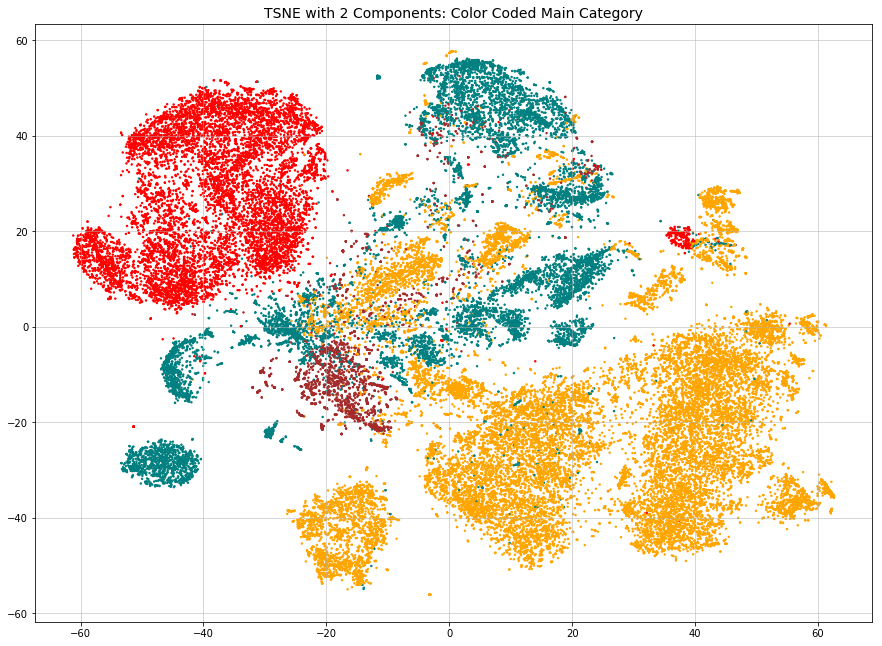

In [24]:
fig, ax = plt.subplots(figsize=(15,11))
ax.scatter(ZZ[:,0],ZZ[:,1], s=2, c= df['color']);
ax.set_title('TSNE with 2 Components: Color Coded Main Category', fontsize=14)
ax.grid(which='both', axis='both', linewidth=.5)
#ax.legend(fontsize=12, markerscale=4)



### Alternative code for including legend

KeyError: 'black'

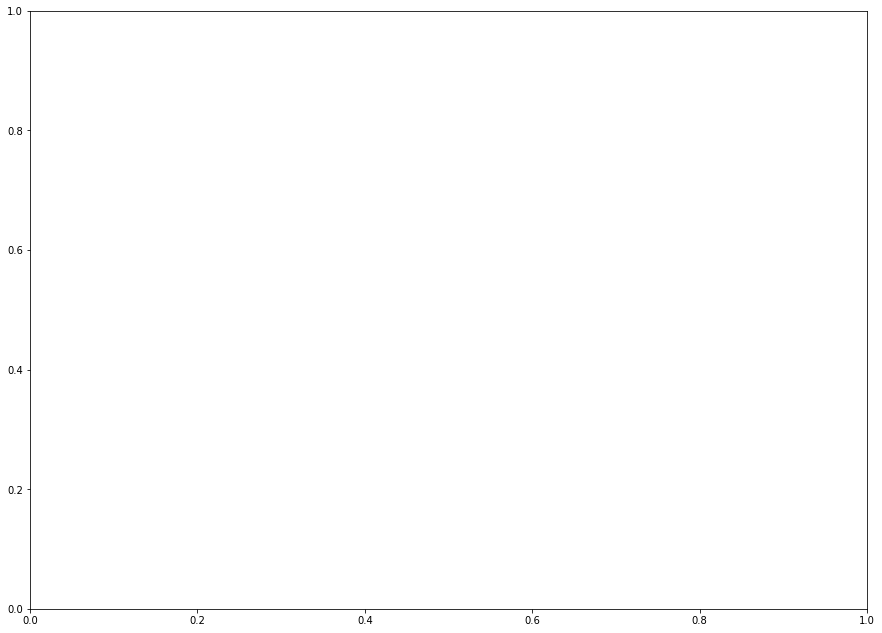

In [17]:
import numpy as np
from matplotlib import pyplot as plt

scatter_x = XX[:,0]
scatter_y = XX[:,1]
group = np.array(df['color'][0:500])
cdict = {0: 'orange', 1: 'teal', 2: 'red', 3:'blue'}

fig, ax = plt.subplots(figsize=(15,11))
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], color = cdict[g], label = cc_inv[g], s = 5)
ax.legend(fontsize=12, markerscale=4)
ax.set_title('TSNE with 2 Components: Color Coded Main Category', fontsize=15)
ax.grid(which='both', axis='both', linewidth=.5)
plt.show()

### Highlight Accessory Subset

In [12]:
accessory_subcats = wear_df[wear_df['masterCategory']=='Accessories'].groupby('subCategory').count()['masterCategory']

In [102]:
dct_accessory_subcat = {'Misc. Accessories':143}
for cat in accessory_subcats.index:
    if accessory_subcats[cat] <= 50:
        dct_accessory_subcat['Misc. Accessories'] += accessory_subcats[cat]
    elif cat != 'Accessories':
        dct_accessory_subcat[cat] = accessory_subcats[cat]
list(dct_accessory_subcat.keys())

['Misc. Accessories',
 'Bags',
 'Belts',
 'Cufflinks',
 'Eyewear',
 'Headwear',
 'Jewellery',
 'Scarves',
 'Socks',
 'Stoles',
 'Ties',
 'Wallets',
 'Watches']

In [87]:
red = '#DF0101'
dk_blue = '#0404B4'
dk_purple = '#8904B1'
dk_green = '#298A08'
pink = '#FA58F4'
yellow = '#F7D358'
lt_blue = '#81BEF7'
lt_purple = '#D0A9F5'
orange = '#FE9A2E'
aqua = '#01DFD7'
lt_green = '#01DF01'
brown = '#8A4B08'
black = '#000000'
grey = '#D8D8D8'
color_list = [black, dk_blue, lt_green, orange, dk_purple, aqua, yellow, dk_green, lt_blue, lt_purple, brown, red, grey]

In [88]:
color13 = color_list[0:13]

In [89]:
color_code_accessories = {k:color13[i] for i, k in enumerate(list(dct_accessory_subcat.keys()))}
color_code_accessories2 = {k:str(color13[i]) for i, k in enumerate(list(dct_accessory_subcat.keys()))}

In [90]:
color_code_accessories

{'Misc. Accessories': '#000000',
 'Bags': '#0404B4',
 'Belts': '#01DF01',
 'Cufflinks': '#FE9A2E',
 'Eyewear': '#8904B1',
 'Headwear': '#01DFD7',
 'Jewellery': '#F7D358',
 'Scarves': '#298A08',
 'Socks': '#81BEF7',
 'Stoles': '#D0A9F5',
 'Ties': '#8A4B08',
 'Wallets': '#DF0101',
 'Watches': '#D8D8D8'}

In [91]:
wear_df['acc_color'] = wear_df.loc[:,'subCategory'].apply(lambda x: color_code_accessories[x] if x in color_code_accessories.keys() else grey )

/Users/Kelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


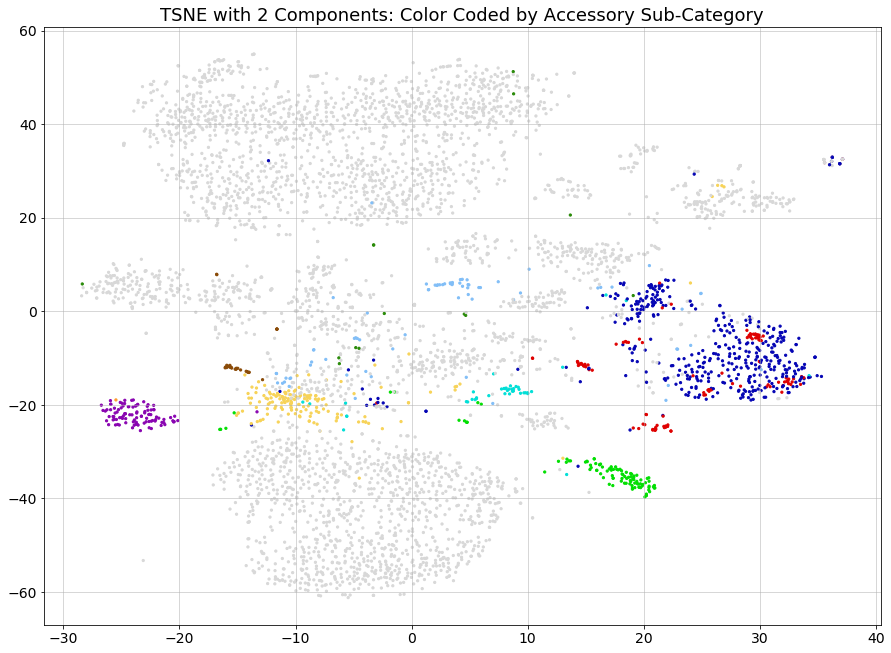

In [131]:
fig, ax = plt.subplots(figsize=(15,11))
ax.scatter(XX[:,0],XX[:,1], s=5, c= wear_df['acc_color'][0:5000]);
ax.set_title('TSNE with 2 Components: Color Coded by Accessory Sub-Category', fontsize=18)
ax.grid(which='both', axis='both', linewidth=.5)
ax.tick_params(labelsize=14)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

scatter_x = XX[:,0]
scatter_y = XX[:,1]
group = np.array(wear_df['color_code_accessories'][0:5000])
cdict = {0: 'orange', 1: 'teal', 2: 'red'}

fig, ax = plt.subplots(figsize=(15,11))
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], color = cdict[g], label = cc_inv[g], s = 5)
ax.legend(fontsize=12, markerscale=4)
ax.set_title('TSNE with 2 Components: Color Coded Main Category', fontsize=15)
ax.grid(which='both', axis='both', linewidth=.5)
plt.show()

### attempt to make it a function 

In [66]:
def plot_subcat_tsne(df, XX, cat_list):
    cat_num = {cat:idx for idx, cat in enumerate(cat_list)}
    df.loc[:,'color_code'] = df.copy().loc[:,'subCategory'].apply(lambda x: cat_num[x] if x in cat_num.keys() else len(cat_list)) 
    cc_inv = {v:k for k, v in cat_num.items()}
    x = XX[:,0]
    y = XX[:,1]
    group = np.array(df['color_code'][0:5000])
    col_list = color_list[0:len(cat_list)+1]
    cdict = {i:col_list[i] for i in range(len(col_list))}

    fig, ax = plt.subplots()
    for g in np.unique(group):
        ix = np.where(group == g)
        ax.scatter(x[ix], y[ix], color = cdict[g], label = cc_inv[g], s = 5)
    ax.legend()
    plt.show()

KeyError: 13

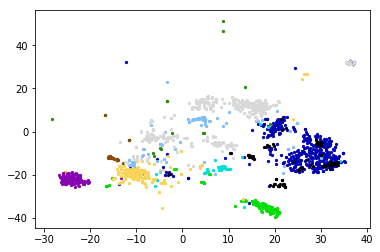

In [67]:
plot_subcat_tsne(wear_df, XX, list(dct_accessory_subcat.keys()))

## footwear subcategories

In [97]:
footwear_subcats = wear_df[wear_df['masterCategory']=='Footwear'].groupby('subCategory').count()['masterCategory']
footwear_subcats

subCategory
Flip Flops     915
Sandal         963
Shoes         7344
Name: masterCategory, dtype: int64

In [101]:
dct_footwear_subcat = {}
for cat in footwear_subcats.index:
    dct_footwear_subcat[cat] = footwear_subcats[cat]
list(dct_footwear_subcat.keys())

['Flip Flops', 'Sandal', 'Shoes']

In [128]:
color3 = ['orange', red, 'teal']
color_code_footwear = {k:color3[i] for i, k in enumerate(list(dct_footwear_subcat.keys()))}
color_code_footwear

{'Flip Flops': 'orange', 'Sandal': '#DF0101', 'Shoes': 'teal'}

In [129]:
wear_df['shoe_color'] = wear_df.loc[:,'subCategory'].apply(lambda x: color_code_footwear[x] if x in color_code_footwear.keys() else grey )

/Users/Kelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


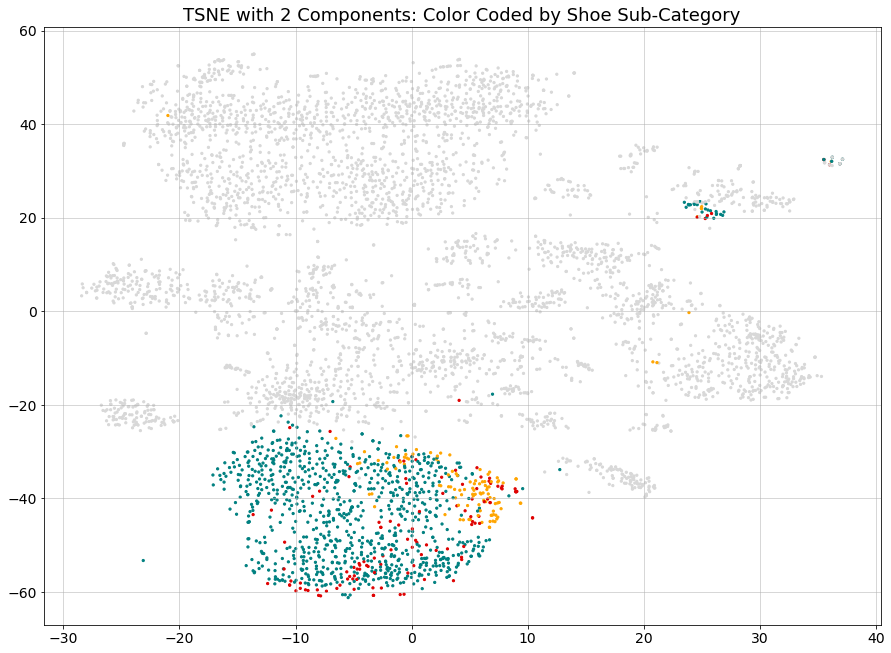

In [130]:
fig, ax = plt.subplots(figsize=(15,11))
ax.scatter(XX[:,0],XX[:,1], s=5, c= wear_df['shoe_color'][0:5000]);
ax.set_title('TSNE with 2 Components: Color Coded by Shoe Sub-Category', fontsize=18)
ax.grid(which='both', axis='both', linewidth=.5)
ax.tick_params(labelsize=14)

## apparel subcategories

In [96]:
apparel_subcats = wear_df[wear_df['masterCategory']=='Apparel'].groupby('subCategory').count()['masterCategory']
apparel_subcats

subCategory
Apparel Set                   106
Bottomwear                   2694
Dress                         478
Innerwear                    1808
Loungewear and Nightwear      470
Saree                         427
Socks                          12
Topwear                     15405
Name: masterCategory, dtype: int64

In [105]:
dct_apparel_subcat = {}
for cat in apparel_subcats.index:
    dct_apparel_subcat[cat] = apparel_subcats[cat]
print(len(dct_apparel_subcat.keys()))
list(dct_apparel_subcat.keys())

8


['Apparel Set',
 'Bottomwear',
 'Dress',
 'Innerwear',
 'Loungewear and Nightwear',
 'Saree',
 'Socks',
 'Topwear']

In [156]:
color8 = ['blue', '#AE1400', dk_purple, '#FF5026', '#78E5D6', 'magenta', '#FFD42E', '#3D9C9F' ]
color_code_apparel = {k:color8[i] for i, k in enumerate(list(dct_apparel_subcat.keys()))}
color_code_apparel

{'Apparel Set': 'blue',
 'Bottomwear': '#AE1400',
 'Dress': '#8904B1',
 'Innerwear': '#FF5026',
 'Loungewear and Nightwear': '#78E5D6',
 'Saree': 'magenta',
 'Socks': '#FFD42E',
 'Topwear': '#3D9C9F'}

In [157]:
wear_df['app_color'] = wear_df.loc[:,'subCategory'].apply(lambda x: color_code_apparel[x] if x in color_code_apparel.keys() else grey )

/Users/Kelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


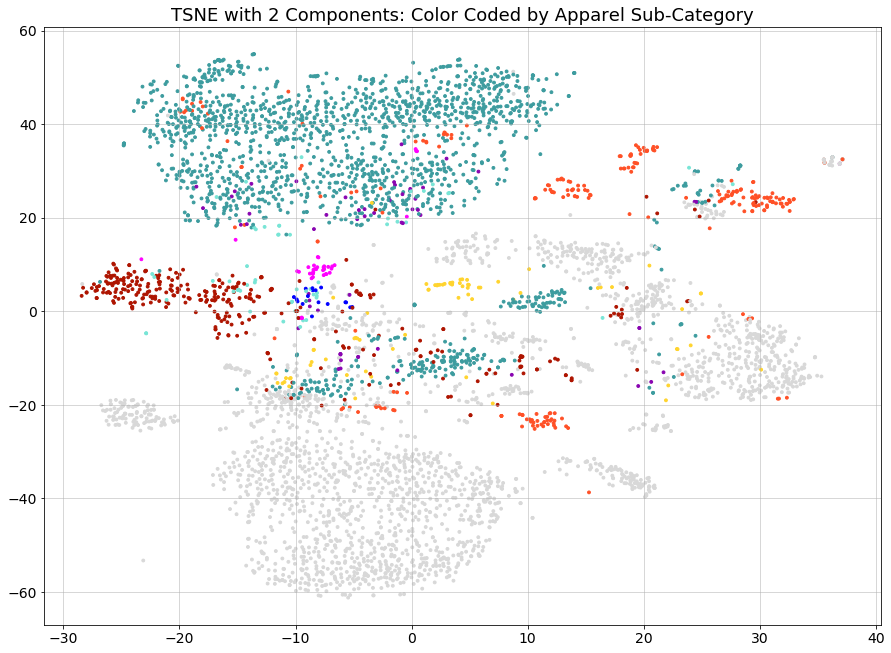

In [159]:
fig, ax = plt.subplots(figsize=(15,11))
ax.scatter(XX[:,0],XX[:,1], s=8, c= wear_df['app_color'][0:5000]);
ax.set_title('TSNE with 2 Components: Color Coded by Apparel Sub-Category', fontsize=18)
ax.grid(which='both', axis='both', linewidth=.5)
ax.tick_params(labelsize=14)

In [160]:
hh = XX[np.where((XX[:,0] < -20)&(XX[:,1] < -15))]
hh

array([[-22.774124, -20.346182],
       [-20.455362, -23.625578],
       [-22.704477, -20.007967],
       [-21.978806, -22.644001],
       [-24.94574 , -19.697615],
       [-20.140623, -23.411764],
       [-22.597904, -22.071913],
       [-24.71176 , -21.912083],
       [-23.97537 , -18.995596],
       [-21.50517 , -23.783325],
       [-24.856987, -20.28332 ],
       [-25.253538, -21.0575  ],
       [-22.442427, -21.133547],
       [-22.312042, -23.397024],
       [-23.076443, -19.381037],
       [-25.721485, -22.529123],
       [-22.042685, -23.179192],
       [-26.279638, -23.448757],
       [-25.633547, -23.135523],
       [-23.662281, -21.554241],
       [-22.467157, -22.133026],
       [-20.41098 , -22.470367],
       [-22.715864, -21.186441],
       [-21.57492 , -24.442022],
       [-25.371437, -21.58458 ],
       [-21.338032, -23.152035],
       [-25.021261, -20.69515 ],
       [-24.990335, -22.771133],
       [-22.976732, -21.455084],
       [-23.11848 , -53.333103],
       [-2